In [30]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from numpy import arange

In [3]:
commission = 25.0
ftt = 0.001

In [23]:
df_open_contracts = pd.DataFrame(columns=['date', 'contract', 'position', 'strike', 'quantity', 'equity'])

In [22]:
def new_contract(type, position, premium, K, quantity: int=1):
    
    td = datetime.today().strftime('%Y-%m-%d')

    if position == 'long':
        # 付權利金
        equity = - premium * 50 * quantity - math.floor(premium * 50 * quantity * ftt) - commission
        
    elif position == 'short':
        # 收權利金
        equity = premium * 50 * quantity - math.floor(premium * 50 * quantity * ftt) - commission
    else:
        raise ValueError('Invalid position')
    
    contract = [td, type, position, K, quantity, equity]

    global df_open_contracts
    df_open_contracts = pd.concat([df_open_contracts, pd.DataFrame([contract], columns=['date', 'contract', 'position', 'strike', 'quantity', 'equity'])], ignore_index=True)
    

In [27]:
new_contract('put', 'short', 86, 17300, 1)

In [28]:
df_open_contracts

,date,contract,position,strike,quantity,equity
0,2023-12-14,put,long,17350,1,-5380.0
1,2023-12-14,put,short,17300,1,4271.0


In [51]:
pnl_df = pd.DataFrame(columns=['s', 'profit'])

In [93]:
pnl_list = []

In [94]:
def cal_pnl(contract, position, premium, k):

    

    for s in arange(16000, 19000, 10):
        
        if contract == 'call':
            pnl = s - k
        elif contract == 'put':
            pnl = k - s
        if position == 'long':
            e = 1
        elif position == 'short':
            e = -1
        
        profit = e * max(pnl*50,0) + premium

        pnl_list.append([s, profit])

In [97]:
k = 17350
contract = 'put'
position = 'long'
premium = -5380

cal_pnl(contract=contract, position=position, premium=premium, k=k)

In [100]:
pnl_df

,s,profit
0,16000,1391
1,16010,1391
2,16020,1391
3,16030,1391
4,16040,1391
...,...,...
295,18950,-1109
296,18960,-1109
297,18970,-1109
298,18980,-1109


<Axes: xlabel='s'>

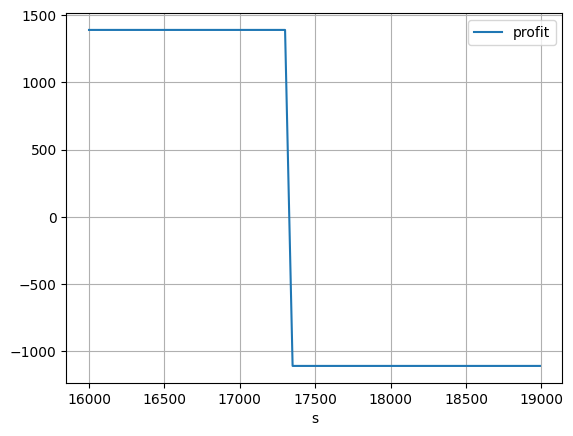

In [98]:
# where column s has the same value, add the profit
pnl_df = pd.DataFrame(pnl_list, columns=['s', 'profit']).groupby('s').sum().reset_index()
pnl_df.plot(x='s', y='profit', grid=True)